# Data Cleaning: Handling Missing Values and Outliers

## Introduction

In this notebook, the focus will be on the crucial task of cleaning the dataset to ensure it is ready for further analysis and modeling. Data cleaning is an essential step in the data science process, as raw data often contains issues that can negatively impact the quality of insights and predictive models.

### Objectives:
1. **Handle Missing Values**: Identify and address missing data points in the dataset, determining the appropriate strategies for imputation or removal.
2. **Outlier Treatment**: Detect and manage outliers that could distort analysis, ensuring they are either addressed or retained based on their significance to the dataset.
3. **Data Consistency**: Ensure that the data is consistent and free from errors that could affect the results of future analyses.

By the end of this process, the dataset will be cleaned, setting the foundation for accurate and reliable analysis. Proper handling of missing values and outliers will reduce noise, prevent bias, and improve the overall quality of the data for modeling.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%run ../census_income/utils/pandas_missing_handler.py
%run ../census_income/utils/pandas_explorer.py

## Data load and first visualization:

In [2]:
path = '../census_income/data/raw_data.csv'
data = pd.read_csv(path).drop(columns=['Unnamed: 0'])
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


## Getting some basic information about the dataset:

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education_num   32560 non-null  int64 
 5   marital_status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   gender          32560 non-null  object
 10  capital_gain    32560 non-null  int64 
 11  capital_loss    32560 non-null  int64 
 12  hours_per_week  32560 non-null  int64 
 13  native_country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [4]:
data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## Looking for missing values:

### Replacing '?' with np.nan:

In [5]:

data[['workclass','occupation','native_country']] = data[['workclass','occupation','native_country']].replace(r'\?',np.nan, regex=True)

In [6]:
data.missing.summary()

,nan,NA,N/A,n/a,N / A,n / a,/,-,*,,None
age,0,0,0,0,0,0,0,0,0,0,0
workclass,1836,0,0,0,0,0,0,0,0,0,1836
fnlwgt,0,0,0,0,0,0,0,0,0,0,0
education,0,0,0,0,0,0,0,0,0,0,0
education_num,0,0,0,0,0,0,0,0,0,0,0
marital_status,0,0,0,0,0,0,0,0,0,0,0
occupation,1843,0,0,0,0,0,0,0,0,0,1843
relationship,0,0,0,0,0,0,0,0,0,0,0
race,0,0,0,0,0,0,0,0,0,0,0
gender,0,0,0,0,0,0,0,0,0,0,0


In [7]:
data.missing.missing_variable_summary()

,variable,n_missing,n_cases,missing_percentage
0,age,0,32560,0.000000
1,workclass,1836,32560,5.638821
2,fnlwgt,0,32560,0.000000
3,education,0,32560,0.000000
4,education_num,0,32560,0.000000
5,marital_status,0,32560,0.000000
6,occupation,1843,32560,5.660319
7,relationship,0,32560,0.000000
8,race,0,32560,0.000000
9,gender,0,32560,0.000000


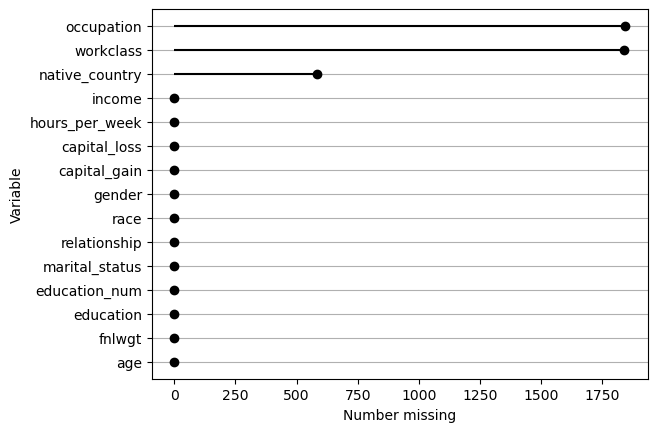

In [8]:
data.missing.missing_variable_plot()

In [9]:
filter_ = data['workclass'].isna() & data['occupation'].isna() & data['native_country']
print(data[filter_].shape)
data[filter_]

(1809, 15)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income
26,54,NaN,180211,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
68,25,NaN,200681,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,<=50K
76,67,NaN,212759,10th,6,Married-civ-spouse,NaN,Husband,White,Male,0,0,2,United-States,<=50K
105,17,NaN,304873,10th,6,Never-married,NaN,Own-child,White,Female,34095,0,32,United-States,<=50K
127,35,NaN,129305,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32529,35,NaN,320084,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,0,0,55,United-States,>50K
32530,30,NaN,33811,Bachelors,13,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32538,71,NaN,287372,Doctorate,16,Married-civ-spouse,NaN,Husband,White,Male,0,0,10,United-States,>50K
32540,41,NaN,202822,HS-grad,9,Separated,NaN,Not-in-family,Black,Female,0,0,32,United-States,<=50K


- There are 1,809 records with missing values in these three columns, and another 34 records with at least one of these columns containing missing values.
- The records with missing values do not appear to have any relationship with each other, so they can be considered Missing Completely at Random (MCAR).
- The number of records with missing values represents 5% of the total.
- Since the records with missing values represent only 5% of the total and most have missing values in the same three columns, it has been decided to remove these records. Imputation would be complex and could introduce biases, so deletion is preferred to maintain the integrity of the analysis.


In [10]:
data.dropna(inplace=True)
print(data.shape)
data.missing.summary()

(30161, 15)


,nan,NA,N/A,n/a,N / A,n / a,/,-,*,,None
age,0,0,0,0,0,0,0,0,0,0,0
workclass,0,0,0,0,0,0,0,0,0,0,0
fnlwgt,0,0,0,0,0,0,0,0,0,0,0
education,0,0,0,0,0,0,0,0,0,0,0
education_num,0,0,0,0,0,0,0,0,0,0,0
marital_status,0,0,0,0,0,0,0,0,0,0,0
occupation,0,0,0,0,0,0,0,0,0,0,0
relationship,0,0,0,0,0,0,0,0,0,0,0
race,0,0,0,0,0,0,0,0,0,0,0
gender,0,0,0,0,0,0,0,0,0,0,0


## Saving the cleaned dataset in a new csv file:

In [11]:
data.to_csv('../census_income/data/cleaned_data.csv')

### Conclusions

In this notebook, the treatment of missing data was addressed, ensuring that the integrity of the dataset was maintained for further analysis. Records with missing values were identified, and it was determined that their percentage was minimal relative to the total dataset size. Therefore, the decision was made to eliminate these records rather than impute values, as this approach minimizes potential bias.

Additionally, handling outliers was deferred to the preprocessing phase. It is anticipated that the nonlinear transformations to be applied during this phase will effectively manage the outliers, allowing for a more robust model performance in subsequent predictive tasks. This strategic separation of data cleaning tasks ensures a structured approach to data preparation, setting the stage for more effective modeling in future analyses.


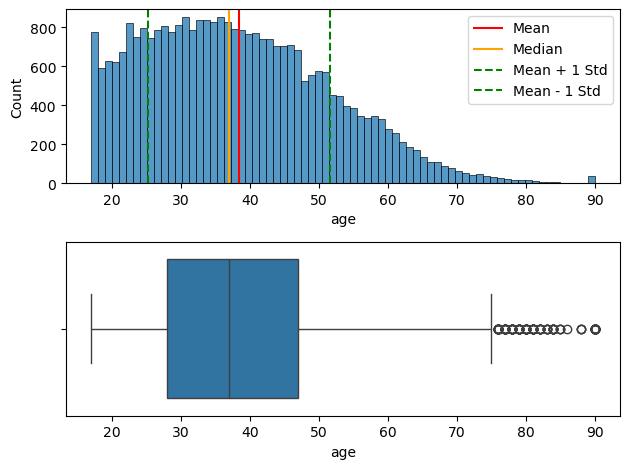

(None,
 age
 36    852
 31    851
 33    837
 34    836
 37    828
      ... 
 82      7
 83      5
 88      3
 85      3
 86      1
 Name: count, Length: 72, dtype: int64)

In [12]:
data.explorer.numerical_dist('age',data['age'].value_counts().count())

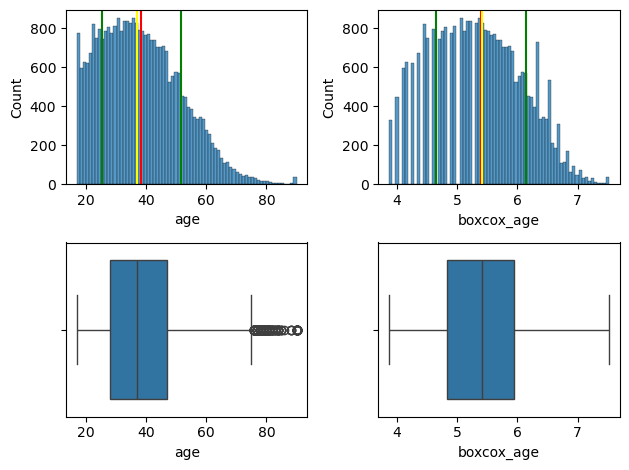

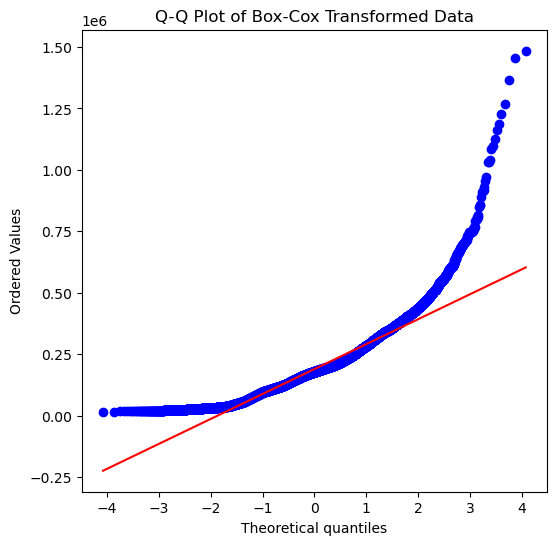

Fitted Lambda: 0.21153426482195092


In [13]:
from scipy.stats import boxcox, probplot
# Asegurarse de que los datos sean positivos
if (data['age'] <= 0).any():
    raise ValueError("Los datos deben ser positivos para aplicar la transformación Box-Cox.")

# Aplicar la transformación Box-Cox
data['boxcox_age'], fitted_lambda = boxcox(data['age'])

# Graficar los datos originales y los transformados
plt.figure()

# Histograma de los datos originales
plt.subplot(2,2,1)
sns.histplot(
    data=data,
    x='age',
    bins = data['age'].value_counts().count()
)
plt.axvline(x=data['age'].mean(), color = 'red')
plt.axvline(x=data['age'].median(), color = 'yellow')
plt.axvline(x=data['age'].mean() + data['age'].std(), color = 'green')
plt.axvline(x=data['age'].mean() - data['age'].std(), color = 'green')
plt.subplot(2,2,3)
sns.boxplot(
    data=data,
    x='age'
)
# Histograma de los datos transformados
plt.subplot(2,2,2)
sns.histplot(
    data=data,
    x='boxcox_age',
    bins = data['boxcox_age'].value_counts().count()
)
plt.axvline(x=data['boxcox_age'].mean(), color = 'red')
plt.axvline(x=data['boxcox_age'].median(), color = 'yellow')
plt.axvline(x=data['boxcox_age'].mean() + data['boxcox_age'].std(), color = 'green')
plt.axvline(x=data['boxcox_age'].mean() - data['boxcox_age'].std(), color = 'green')
plt.subplot(2,2,4)
sns.boxplot(
    data=data,
    x='boxcox_age'
)
plt.tight_layout()
plt.show()

# Graficar el Q-Q plot para evaluar la normalidad
plt.figure(figsize=(6, 6))
probplot(data['fnlwgt'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Box-Cox Transformed Data')
plt.show()

print(f'Fitted Lambda: {fitted_lambda}')


## Creating a 'Capital_balance' Column to Better Explain the 'Capital_gain' and 'Capital_loss' Data

In [14]:
data['capital_balance'] = data['capital_gain'] - data['capital_loss']
data['capital_balance'][data['capital_balance'] == 0].shape

(26197,)

- There are 26,197 records with a capital balance equal to 0, which can be interpreted as all these people did not make any kind of investment.

In [15]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income,boxcox_age,capital_balance
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,6.087213,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,5.477272,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,6.221337,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,4.838907,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,5.419867,0
